In [16]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from bs4 import BeautifulSoup
import pandas as pd
browser = webdriver.Chrome()
#정왕동에서 시작
browser.get("https://new.land.naver.com/complexes/113317?ms=37.3525,126.7279,16&a=APT:ABYG:JGC&e=RETAIL")


import time
#아래 팝업창 뜨게 하기(아래 세모버튼 누르기?) xpath 사용
browser.find_element_by_xpath('//*[@id="region_filter"]/div/a/span[4]').click()
time.sleep(1)

apt_data=[]
#순차적으로 아래있는것을 클릭하게 함
for i in range(1, 100):  #range의 1 다음의 수(11)을 바꿔 몇번 반복할지 설정 할 수 있다.
    pead_path = '//*[@id="region_filter"]/div/div/div[3]/ul/li[{0}]/a'.format(i)
    pead = browser.find_element_by_xpath(pead_path).click()
    time.sleep(1)
    
    #왼쪽에 있는첫번째것을 클릭
    #browser.find_element_by_css_selector("div.item_inner").click()
    #time.sleep(2)
    
    #광고가 뜨면 아파트 이름이 인식이 안되므로 try except 문 사용
    try:
        browser.find_element_by_css_selector("div.item_inner").click()
        time.sleep(1)
        #아파트 이름
        apt_name_path = 'div.main_info_area > div.info_title_wrap > h4 > strong'
        apt_name = browser.find_element_by_css_selector(apt_name_path)
        name = apt_name.text.split(" ")[0]
        #매매, 전세, 월세 구분
        apt_type_path = 'div.main_info_area > div.info_article_price > span.type'
        apt_type = browser.find_element_by_css_selector(apt_type_path)
        typ = apt_type.text
        #아파트 가격
        apt_price_path = 'div.main_info_area > div.info_article_price > span.price'
        apt_price = browser.find_element_by_css_selector(apt_price_path)
        price = apt_price.text
        #아파트 방향
        apt_way_path = 'div.detail_box--summary > table > tbody > tr:nth-child(6) > td'
        apt_way = browser.find_element_by_css_selector(apt_way_path)
        way = apt_way.text
        #관리비
        apt_mange_path = 'div.detail_box--summary > table > tbody > tr:nth-child(4) > td:nth-child(2)'
        apt_mange = browser.find_element_by_css_selector(apt_mange_path)
        mange = apt_mange.text
        #매물특징
        apt_feature_path = '//*[@id="detailContents1"]/div[1]/table/tbody/tr[1]/td'
        apt_feature = browser.find_element_by_xpath(apt_feature_path)
        feature = apt_feature.text
        #평수클릭
        browser.find_element_by_xpath('//*[@id="tabArea"]/button').click()
        time.sleep(1)
        #평수
        apt_space_path = 'div.detail_box--summary > table > tbody > tr:nth-child(2) > td'
        apt_space = browser.find_element_by_css_selector(apt_space_path)
        space = apt_space.text
        #층수
        apt_floor_path = 'div.detail_box--summary > table > tbody > tr:nth-child(3) > td:nth-child(2)'
        apt_floor = browser.find_element_by_css_selector(apt_floor_path)
        floor = apt_floor.text
        #학군정보 클릭
        browser.find_element_by_css_selector('.tab_area_list #detailTab4  span.text').click()
        time.sleep(1)
        #학군정보 학교이름
        school_name_path = '#detailContents5 > div > div.detail_box--school > div.heading > h5'
        school_name = browser.find_element_by_css_selector(school_name_path)
        school = school_name.text
        #학군정보 학교까지 거리
        school_distance_path = '//*[@id="detailContents5"]/div/div[1]/div[2]/div[2]/div[2]'
        school_distance = browser.find_element_by_xpath(school_distance_path)
        distance = school_distance.text
        #x버튼 누르기
        browser.find_element_by_css_selector("div.detail_panel > div > button").click()
        time.sleep(1)
        #아래 팝업창 뜨게 하기(아래 세모버튼 누르기?) xpath 사용
        browser.find_element_by_xpath('//*[@id="region_filter"]/div/a/span[4]').click()
        time.sleep(1)
        print(name, typ, price, way, mange, feature, space, floor, school, distance)
        apt_data.append([name, typ, price, way, mange, feature, space, floor, school, distance])
        
    #아파트 이름을 찾지 못할 때 x버튼을 누르고 다음 아파트 검색
    except:
        browser.find_element_by_css_selector("div.detail_panel > div > button").click()
        time.sleep(2)
        browser.find_element_by_xpath('//*[@id="region_filter"]/div/a/span[4]').click()
        time.sleep(2)
        test1_path = '//*[@id="region_filter"]/div/div/div[3]/ul/li[{0}]/a/span'.format(i)
        test1 = browser.find_element_by_xpath(test1_path)
        test2=test1.text
        print("불러오지 못한 아파트", test2)
        

SyntaxError: default 'except:' must be last (2724800807.py, line 86)

In [17]:
apt_data

[['건영1차',
  '전세',
  '3억 3,000',
  '남서향(거실 기준)',
  '12만원',
  '올수리되어 아주깨끗한집 .학교,상권가까워서 생활편리합니다.빠른입주가능',
  '32.89평/25.69평(전용률78%)',
  '10/10층',
  '정왕초등학교',
  '도보로 4분'],
 ['건영2차',
  '매매',
  '3억 8,000',
  '남동향(거실 기준)',
  '18만원',
  '올수리 올확장 전세끼고매매 협의',
  '32.89평/25.69평(전용률78%)',
  '10/10층',
  '송운초등학교',
  '도보로 6분'],
 ['계룡1차',
  '매매',
  '4억 3,000',
  '남서향(거실 기준)',
  '15만원',
  '약간수리된집 전망굿 상가인접생활권좋음',
  '32.39평/25.7평(전용률79%)',
  '4/10층',
  '서촌초등학교',
  '도보로 5분'],
 ['계룡2차',
  '매매',
  '3억',
  '남동향(거실 기준)',
  '15만원',
  '최근전체올수리. 전세끼고 투자강추',
  '24.01평/18.08평(전용률75%)',
  '3/10층',
  '서해초등학교',
  '도보로 8분'],
 ['고합',
  '매매',
  '2억 8,500',
  '남서향(거실 기준)',
  '13만원',
  '전체올수리. 거실확장. 안방붙박이장. 이사협의. 조정가',
  '22.24평/18.13평(전용률82%)',
  '4/5층',
  '송운초등학교',
  '도보로 6분'],
 ['금강',
  '매매',
  '3억 3,000',
  '남동향(거실 기준)',
  '12만원',
  '올수리되어 아주깨끗 이마트상권 초중교인접',
  '22.36평/18.14평(전용률81%)',
  '4/5층',
  '정왕초등학교',
  '도보로 6분'],
 ['대림1단지',
  '매매',
  '4억 6,000',
  '남서향(거실 기준)',
  '20만원',
  '세낀투자매물 올수리된깨끗한집 상권.교통.주변환경좋은매물 투자가치너무좋아요',

In [18]:
#가져온 데이터 갯수
apt_data = get_apt_items(apt_data)
print(len(apt_data))

55


In [19]:
from pandas import Series, DataFrame
import pandas as pd
columns = ['이름', '구분', '가격', '방향', '관리비', '매물특징', '평수', '층수', '학교명', '학교까지 거리']
pd_data = pd.DataFrame(apt_data, columns = columns)
display(pd_data)
pd_data.to_excel('./mange2.xlsx', index = False)



,이름,구분,가격,방향,관리비,매물특징,평수,층수,학교명,학교까지 거리
0,,,,,,,,,,
1,,,,,,,,,,
2,,,,,,,,,,
3,,,,,,,,,,
4,,,,,,,,,,
5,,,,,,,,,,
6,,,,,,,,,,
7,,,,,,,,,,
8,,,,,,,,,,
9,,,,,,,,,,


In [4]:
#액셀의 특정열 리스트로 변환하기(이름, 관리비)
from openpyxl import load_workbook


read_xlsx = load_workbook('mange_2.xlsx')
read_sheet = read_xlsx.active


name_col = read_sheet['E']
names = []
for cell in name_col:
    names.append(cell.value)
print(names)
name1_col = read_sheet['A']
realNames = []
for cell1 in name1_col:
    realNames.append(cell1.value)
print(realNames)


['관리비', '16만원', '18만원', '15만원', '12만원', '15만원', '12만원', '20만원', '8만원', '22만원', '24만원', '없음', '12만원', '19.9305만원', '21만원', '12만원', '16만원', '10만원', '4만원', '19만원', '-', '21만원', '19만원', '13만원', '15만원', '18만원', '-', '18만원', '25만원', '-', '13만원', '6만원', '17만원', '17만원', '10만원', '15만원', '15만원', '20만원', '12만원', '12만원', '15만원', '10만원', '16만원', '15만원', '18만원', '20만원', '10만원', '15만원', '20.6만원', '18만원', '13만원', '12만원', '13만원', '10만원', '13만원', '13.6만원', '없음']
['이름', '건영1차 117동', '건영2차 220동', '계룡1차 102동', '계룡2차 212동', '고합 111동', '금강 107동', '대림1단지 6306동', '대림2단지 7205동', '대림3단지 1202동', '대림4단지 1312동', '대우 102동', '동남 114동', '동보 103동', '동원 108동', '두산 120동', '모아 107동', '무진 110동', '문영센스빌 108동', '미주 103동', '보성 105동', '부성파스텔 108동', '삼성 102동', '삼환 201동', '서촌마을건영4단지 105동', '서촌마을영화하이닉스 102동', '서해1차 116동', '서해2차 211동', '세종1차 108동', '세종2차 211동', '세종3차 309동', '스카이드림씨티(도시형) 1동', '시화유천 909동', '시화평안마을건영5차 508동', '신동아1단지 104동', '신동아2단지 209동', '신우 101동', '신호새피앙 109동', '아주 102동', '영남1차 108동', '영남2차 207동', '영남3차 309동', '영남

In [6]:
#이름과 관리비 리스트에서 필요없는 부분 제거
names.remove('관리비')
print(names)
realNames.remove('이름')
print(realNames)

ValueError: list.remove(x): x not in list

In [7]:
#관리비 리스트에서 뒤에 만원 글자 제거
search = '만원'
for i, word in enumerate(names):
    if search in word: 
        print('>> modify: ' + word)
        names[i] = word.strip(search)
print(names)

>> modify: 16만원
>> modify: 18만원
>> modify: 15만원
>> modify: 12만원
>> modify: 15만원
>> modify: 12만원
>> modify: 20만원
>> modify: 8만원
>> modify: 22만원
>> modify: 24만원
>> modify: 12만원
>> modify: 19.9305만원
>> modify: 21만원
>> modify: 12만원
>> modify: 16만원
>> modify: 10만원
>> modify: 4만원
>> modify: 19만원
>> modify: 21만원
>> modify: 19만원
>> modify: 13만원
>> modify: 15만원
>> modify: 18만원
>> modify: 18만원
>> modify: 25만원
>> modify: 13만원
>> modify: 6만원
>> modify: 17만원
>> modify: 17만원
>> modify: 10만원
>> modify: 15만원
>> modify: 15만원
>> modify: 20만원
>> modify: 12만원
>> modify: 12만원
>> modify: 15만원
>> modify: 10만원
>> modify: 16만원
>> modify: 15만원
>> modify: 18만원
>> modify: 20만원
>> modify: 10만원
>> modify: 15만원
>> modify: 20.6만원
>> modify: 18만원
>> modify: 13만원
>> modify: 12만원
>> modify: 13만원
>> modify: 10만원
>> modify: 13만원
>> modify: 13.6만원
['16', '18', '15', '12', '15', '12', '20', '8', '22', '24', '없음', '12', '19.9305', '21', '12', '16', '10', '4', '19', '-', '21', '19', '13', '15', '18', '-', '18', '25', '-', '13

In [8]:
#값이 없는것과 '-'인 값을 0으로 변환
def change_names(names):
    for index, value in enumerate(names):
        if value == '없음':
            names[index] = 0
        if value == '-':
            names[index] = 0
        if value == '2억4,600만원':
            names[index] = 0

change_names(names)

In [9]:
print(names)

['16', '18', '15', '12', '15', '12', '20', '8', '22', '24', 0, '12', '19.9305', '21', '12', '16', '10', '4', '19', 0, '21', '19', '13', '15', '18', 0, '18', '25', 0, '13', '6', '17', '17', '10', '15', '15', '20', '12', '12', '15', '10', '16', '15', '18', '20', '10', '15', '20.6', '18', '13', '12', '13', '10', '13', '13.6', 0]


In [10]:
#관리비 리스트에서 문자열을 float형으로 변환
mange_int = list(map(float, names))
print(mange_int)


[16.0, 18.0, 15.0, 12.0, 15.0, 12.0, 20.0, 8.0, 22.0, 24.0, 0.0, 12.0, 19.9305, 21.0, 12.0, 16.0, 10.0, 4.0, 19.0, 0.0, 21.0, 19.0, 13.0, 15.0, 18.0, 0.0, 18.0, 25.0, 0.0, 13.0, 6.0, 17.0, 17.0, 10.0, 15.0, 15.0, 20.0, 12.0, 12.0, 15.0, 10.0, 16.0, 15.0, 18.0, 20.0, 10.0, 15.0, 20.6, 18.0, 13.0, 12.0, 13.0, 10.0, 13.0, 13.6, 0.0]


In [11]:
#numpy round를 사용하여 반올림
import numpy as np
mange_round = np.round(mange_int,0)
mange_round

array([16., 18., 15., 12., 15., 12., 20.,  8., 22., 24.,  0., 12., 20.,
       21., 12., 16., 10.,  4., 19.,  0., 21., 19., 13., 15., 18.,  0.,
       18., 25.,  0., 13.,  6., 17., 17., 10., 15., 15., 20., 12., 12.,
       15., 10., 16., 15., 18., 20., 10., 15., 21., 18., 13., 12., 13.,
       10., 13., 14.,  0.])

In [12]:
#이름 리스트 출력
print(realNames)

['건영1차 117동', '건영2차 220동', '계룡1차 102동', '계룡2차 212동', '고합 111동', '금강 107동', '대림1단지 6306동', '대림2단지 7205동', '대림3단지 1202동', '대림4단지 1312동', '대우 102동', '동남 114동', '동보 103동', '동원 108동', '두산 120동', '모아 107동', '무진 110동', '문영센스빌 108동', '미주 103동', '보성 105동', '부성파스텔 108동', '삼성 102동', '삼환 201동', '서촌마을건영4단지 105동', '서촌마을영화하이닉스 102동', '서해1차 116동', '서해2차 211동', '세종1차 108동', '세종2차 211동', '세종3차 309동', '스카이드림씨티(도시형) 1동', '시화유천 909동', '시화평안마을건영5차 508동', '신동아1단지 104동', '신동아2단지 209동', '신우 101동', '신호새피앙 109동', '아주 102동', '영남1차 108동', '영남2차 207동', '영남3차 309동', '영남4차 409동', '영남6차 607동', '옥구마을건영7차 102동', '요진 119동', '월드 102동', '주공1단지 101동', '주공2단지 210동', '주공4단지 407동', '주공5단지 508동', '주공6단지 604동', '진로 104동', '청솔 103동', '한신 101동', '한일 111동', '화성 106동']


In [13]:
#관리비 리스트 출력
print(mange_round)

[16. 18. 15. 12. 15. 12. 20.  8. 22. 24.  0. 12. 20. 21. 12. 16. 10.  4.
 19.  0. 21. 19. 13. 15. 18.  0. 18. 25.  0. 13.  6. 17. 17. 10. 15. 15.
 20. 12. 12. 15. 10. 16. 15. 18. 20. 10. 15. 21. 18. 13. 12. 13. 10. 13.
 14.  0.]


In [15]:
import pandas as pd
apt_names_df = pd.DataFrame(realNames, columns = ['아파트'])


,아파트
0,건영1차 117동
1,건영2차 220동
2,계룡1차 102동
3,계룡2차 212동
4,고합 111동
5,금강 107동
6,대림1단지 6306동
7,대림2단지 7205동
8,대림3단지 1202동
9,대림4단지 1312동


In [16]:
import pandas as pd
apt_mange_df = pd.DataFrame(mange_round, columns = ['관리비'])
apt_mange_df

,관리비
0,16.0
1,18.0
2,15.0
3,12.0
4,15.0
5,12.0
6,20.0
7,8.0
8,22.0
9,24.0


In [18]:
result = pd.concat([apt_names_df,apt_mange_df],axis=1)
result

,아파트,관리비
0,건영1차 117동,16.0
1,건영2차 220동,18.0
2,계룡1차 102동,15.0
3,계룡2차 212동,12.0
4,고합 111동,15.0
5,금강 107동,12.0
6,대림1단지 6306동,20.0
7,대림2단지 7205동,8.0
8,대림3단지 1202동,22.0
9,대림4단지 1312동,24.0


In [24]:
result_1 = result.sort_values(by='관리비', ascending=False).head(20)
result_1

,아파트,관리비
27,세종1차 108동,25.0
9,대림4단지 1312동,24.0
8,대림3단지 1202동,22.0
20,부성파스텔 108동,21.0
47,주공2단지 210동,21.0
13,동원 108동,21.0
36,신호새피앙 109동,20.0
12,동보 103동,20.0
44,요진 119동,20.0
6,대림1단지 6306동,20.0


In [25]:
result_2 = result_1.reset_index(drop=True)
result_2

,아파트,관리비
0,세종1차 108동,25.0
1,대림4단지 1312동,24.0
2,대림3단지 1202동,22.0
3,부성파스텔 108동,21.0
4,주공2단지 210동,21.0
5,동원 108동,21.0
6,신호새피앙 109동,20.0
7,동보 103동,20.0
8,요진 119동,20.0
9,대림1단지 6306동,20.0


In [11]:
#x축 한글 깨짐 처리하기
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

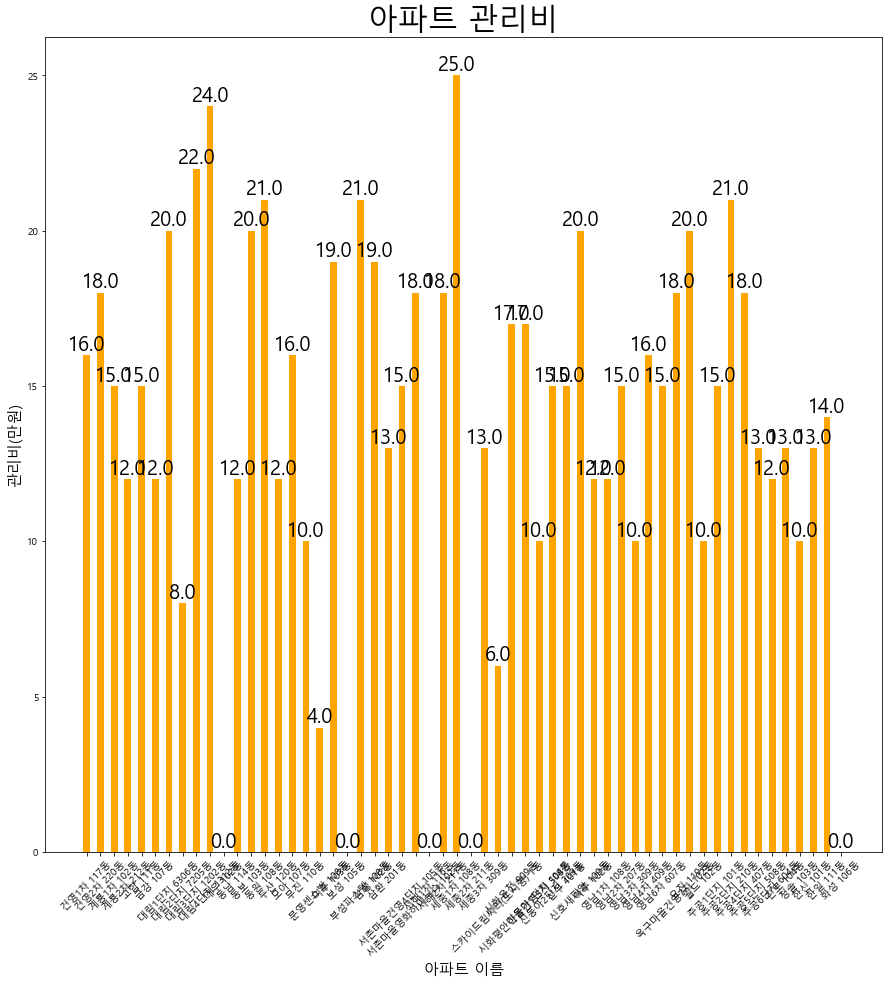

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#시각화 최종(막대+꺽은선)
fig = plt.figure(figsize=(15, 15)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정

colors = sns.color_palette('summer', len(realNames)) ## 바 차트 색상


plt.xlabel("아파트 이름", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("관리비(만원)", fontsize=15)
plt.title("아파트 관리비", fontsize=30)
bar = plt.bar(sorted(realNames), mange_round, width=0.5, color='orange') #x축:realNames y축:mange_int
for i, v in enumerate(realNames):
    plt.text(v, mange_round[i], str(mange_round[i]),
             fontsize=20,
             color="black",
             horizontalalignment='center',
             verticalalignment='bottom')

plt.show()